In [232]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
city_data.tail()
ride_data.head()

#city_data.count()
#ride_data.count()

# Combine the data into a single dataset

# Display the data table for preview


city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344

In [233]:
merged_table = pd.merge(city_data,ride_data,on="city",how="outer")
#merged_table.count()
merged_table.head()

city  driver_count   type                 date   fare        ride_id
0  Richardfort            38  Urban  2018-02-24 08:40:38  13.93  5628545007794
1  Richardfort            38  Urban  2018-02-13 12:46:07  14.00   910050116494
2  Richardfort            38  Urban  2018-02-16 13:52:19  17.92   820639054416
3  Richardfort            38  Urban  2018-02-01 20:18:28  10.26  9554935945413
4  Richardfort            38  Urban  2018-04-17 02:26:37  23.00   720020655850

## Bubble Plot of Ride Sharing Data

In [235]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [236]:
urban_data_df = merged_table[merged_table['type']=="Urban"]
urban_data_df.head()

city  driver_count   type                 date   fare        ride_id
0  Richardfort            38  Urban  2018-02-24 08:40:38  13.93  5628545007794
1  Richardfort            38  Urban  2018-02-13 12:46:07  14.00   910050116494
2  Richardfort            38  Urban  2018-02-16 13:52:19  17.92   820639054416
3  Richardfort            38  Urban  2018-02-01 20:18:28  10.26  9554935945413
4  Richardfort            38  Urban  2018-04-17 02:26:37  23.00   720020655850

In [237]:
groupby_city_urban = urban_data_df['fare'].groupby(urban_data_df['city'])

list(urban_data_df['fare'].groupby(urban_data_df['city']))

urban_city_df =pd.DataFrame(groupby_city_urban.describe())
del urban_city_df['std']
del urban_city_df['min']
del urban_city_df['25%']
del urban_city_df['50%']
del urban_city_df['75%']
del urban_city_df['max']



urban_city_df.head()

count       mean
city                             
Amandaburgh       18.0  24.641667
Barajasview       22.0  25.332273
Carriemouth       27.0  28.314444
Christopherfurt   27.0  24.501852
Deanville         19.0  25.842632

In [238]:
urban_df = pd.merge(urban_city_df,city_data,on="city",how="inner")
urban_df.head()




city  count       mean  driver_count   type
0      Amandaburgh   18.0  24.641667            12  Urban
1      Barajasview   22.0  25.332273            26  Urban
2      Carriemouth   27.0  28.314444            52  Urban
3  Christopherfurt   27.0  24.501852            41  Urban
4        Deanville   19.0  25.842632            49  Urban

In [241]:
suburban_data_df = merged_table[merged_table['type']=="Suburban"]
suburban_data_df.head()
groupby_city_suburban = suburban_data_df['fare'].groupby(suburban_data_df['city'])

list(suburban_data_df['fare'].groupby(suburban_data_df['city']))

suburban_city_df =pd.DataFrame(groupby_city_suburban.describe())
del suburban_city_df['std']
del suburban_city_df['min']
del suburban_city_df['25%']
del suburban_city_df['50%']
del suburban_city_df['75%']
del suburban_city_df['max']

suburban_df = pd.merge(suburban_city_df,city_data,on="city",how="inner")
suburban_df.head()

#suburban_df.plot(kind="scatter", x="count", y="mean", grid=True,s=(suburban_df['driver_count']*10),color="Blue",alpha=.4)


city  count       mean  driver_count      type
0  Barronchester   16.0  36.422500            11  Suburban
1    Bethanyland   18.0  32.956111            22  Suburban
2    Brandonfort   19.0  35.437368            10  Suburban
3    Colemanland   22.0  30.894545            23  Suburban
4      Davidfurt   17.0  31.995882            23  Suburban

In [242]:
rural_data_df = merged_table[merged_table['type']=="Rural"]
rural_data_df.head()
groupby_city_rural = rural_data_df['fare'].groupby(rural_data_df['city'])

list(rural_data_df['fare'].groupby(rural_data_df['city']))

rural_city_df =pd.DataFrame(groupby_city_rural.describe())
del rural_city_df['std']
del rural_city_df['min']
del rural_city_df['25%']
del rural_city_df['50%']
del rural_city_df['75%']
del rural_city_df['max']

rural_df = pd.merge(rural_city_df,city_data,on="city",how="inner")
rural_df.head()

#rural_df.plot(kind="scatter", x="count", y="mean", grid=True,s=(rural_df['driver_count']*10),color="y",alpha=.4)


city  count       mean  driver_count   type
0    Bradshawfurt   10.0  40.064000             7  Rural
1       Garzaport    3.0  24.123333             7  Rural
2  Harringtonfort    6.0  33.470000             4  Rural
3     Jessicaport    6.0  36.013333             1  Rural
4      Lake Jamie    6.0  34.358333             4  Rural

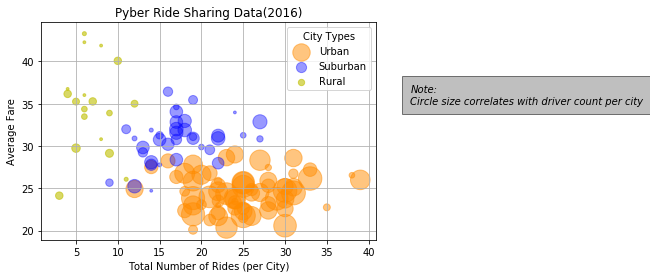

In [245]:

ax1 = urban_df.plot(kind="scatter", x="count", y="mean", label='Urban', grid=True,s=(urban_df['driver_count']*8),color="DarkOrange",alpha=.5,)
ax2 = suburban_df.plot(kind="scatter", x="count", y="mean", label='Suburban', grid=True,s=(suburban_df['driver_count']*8),color="blue",alpha=.4,ax=ax1)
ax3 = rural_df.plot(kind="scatter", x="count", y="mean", label='Rural', grid=True,s=(rural_df['driver_count']*8),color="y",alpha=.6,ax=ax1)
ax1.set_xlabel("Total Number of Rides (per City)")
ax1.set_ylabel("Average Fare")
plt.title('Pyber Ride Sharing Data(2016)')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)
legend = plt.legend(title="City Types", ncol=1)
legend._legend_box.sep = 5

ax1.text(45, 35, 'Note:\nCircle size correlates with driver count per city', style='italic',
        bbox={'facecolor':'grey', 'alpha':0.5, 'pad':8})

plt.show()





## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()